In [1]:
import numpy as np
import scipy.linalg as splin
from scipy.integrate import LSODA, solve_ivp
import matplotlib.pyplot as plt

from consts import *
from lyapunov import *
from pac import *
from potential import *
from lyap_obj import *

from manifold import *

In [2]:
# Load orbits from file
L1_0 = load_orbit("out/L1_0.npz")
L1_1 = load_orbit("out/L1_1.npz")

L2_0 = load_orbit("out/L2_0.npz")
L2_1 = load_orbit("out/L2_1.npz")

L1_orbits = [L1_0, L1_1]
L2_orbits = [L2_0, L2_1]

In [3]:
manL1 = Manifold(L1_0)



In [4]:
_ = manL1.compute_manifold(30, terminal=False)

Curve 1/30 computed
Curve 2/30 computed
Curve 3/30 computed
Curve 4/30 computed
Curve 5/30 computed
Curve 6/30 computed
Curve 7/30 computed
Curve 8/30 computed
Curve 9/30 computed
Curve 10/30 computed
Curve 11/30 computed
Curve 12/30 computed
Curve 13/30 computed
Curve 14/30 computed
Curve 15/30 computed
Curve 16/30 computed
Curve 17/30 computed
Curve 18/30 computed
Curve 19/30 computed
Curve 20/30 computed
Curve 21/30 computed
Curve 22/30 computed
Curve 23/30 computed
Curve 24/30 computed
Curve 25/30 computed
Curve 26/30 computed
Curve 27/30 computed
Curve 28/30 computed
Curve 29/30 computed
Curve 30/30 computed


(np.float64(-2.4392828180474497),
 np.float64(2.0),
 np.float64(-2.0),
 np.float64(2.64693045080007))

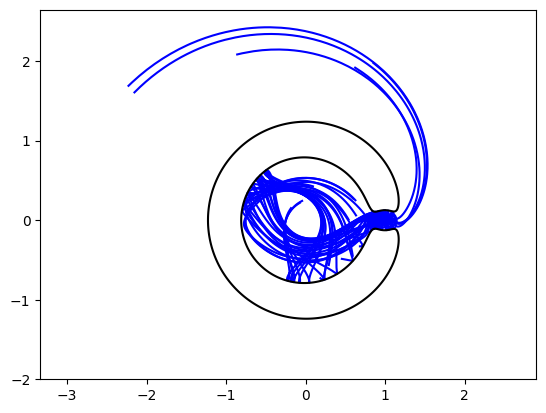

In [5]:
kw = {"color": "blue"}

ax = manL1.plot_stable(30, **kw)
ax = manL1.plot_ZVC(ax=ax)
ax.axis("equal")

In [6]:
def EPS(S, tol):
    # Poincare section at x = 1 - mu
    x_s = 1 - muEM
    # In theory we place the section plane at x and call it a day, 
    # but in practice we need to account for the fact that the section
    # cannot be infinite on the y axis or it catches unwanted solutions
    # So we limit y to +/- 0.25, well inside the ZVC at 1-mu

    y_lim = 0.25

    # Compute the distance to the section
    dist_x = np.abs(S[0] - x_s)
    dist_y = np.abs(S[1] - y_lim)

    if dist_x < tol and abs(S[1]) < y_lim:
        return True
    else:
        return False

In [7]:
cuts, surs, cutu, suru = manL1.surface_hit(EPS, 1e-3)

In [8]:
print(len(cuts), len(cutu))

60 60


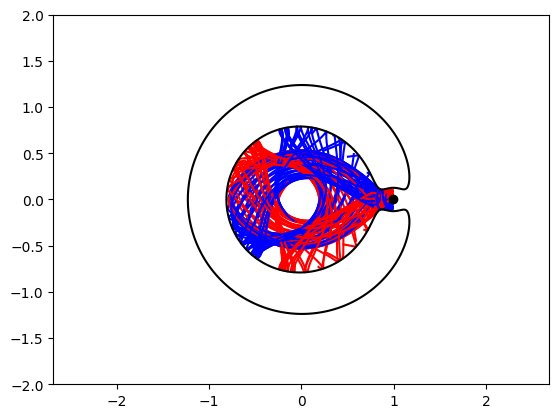

In [20]:
# Plot the cuts
plt.figure()
for i in range(len(cuts)):
    plt.plot(cuts[i][0], cuts[i][1], "r",)
    plt.plot(cutu[i][0], cutu[i][1], "b",)

manL1.plot_ZVC()
plt.axis("equal")
plt.plot([1-muEM], [0], "ko")
plt.show()

In [10]:
manL2 = Manifold(L2_0)



In [11]:
_ = manL2.compute_manifold(30, terminal=False)

Curve 1/30 computed
Curve 2/30 computed
Curve 3/30 computed
Curve 4/30 computed
Curve 5/30 computed
Curve 6/30 computed
Curve 7/30 computed
Curve 8/30 computed
Curve 9/30 computed
Curve 10/30 computed
Curve 11/30 computed
Curve 12/30 computed
Curve 13/30 computed
Curve 14/30 computed
Curve 15/30 computed
Curve 16/30 computed
Curve 17/30 computed
Curve 18/30 computed
Curve 19/30 computed
Curve 20/30 computed
Curve 21/30 computed
Curve 22/30 computed
Curve 23/30 computed
Curve 24/30 computed
Curve 25/30 computed
Curve 26/30 computed
Curve 27/30 computed
Curve 28/30 computed
Curve 29/30 computed
Curve 30/30 computed


<Axes: >

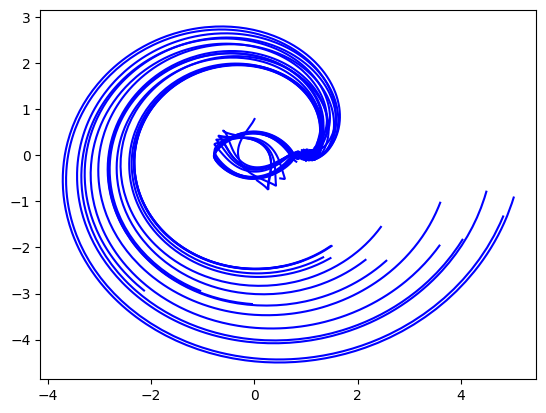

In [12]:
manL2.plot_stable(30, **kw)

In [13]:
cutsL2, sursL2, cutuL2, suruL2 = manL2.surface_hit(EPS, 1e-3)

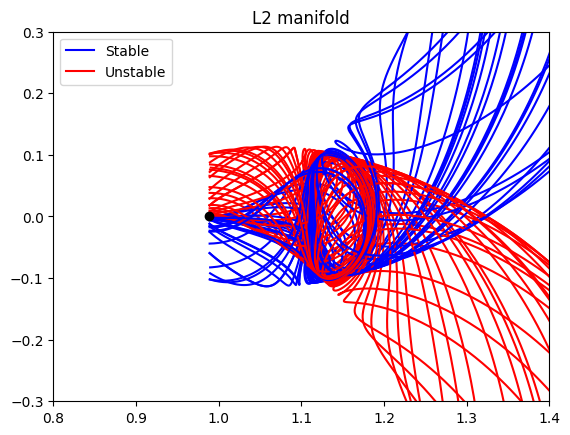

In [56]:
plt.figure()
for i in range(len(cutsL2)):
    if i == 0:
        plt.plot(cutsL2[i][0], cutsL2[i][1], "b", label="Stable")
        plt.plot(cutuL2[i][0], cutuL2[i][1], "r", label="Unstable")
    else:
        plt.plot(cutsL2[i][0], cutsL2[i][1], "b")
        plt.plot(cutuL2[i][0], cutuL2[i][1], "r")
    
plt.plot([1-muEM], [0], "ko")
plt.xlim(0.8, 1.4)
plt.ylim(-0.3, 0.3)
plt.legend()
plt.title("L2 manifold")
plt.show()

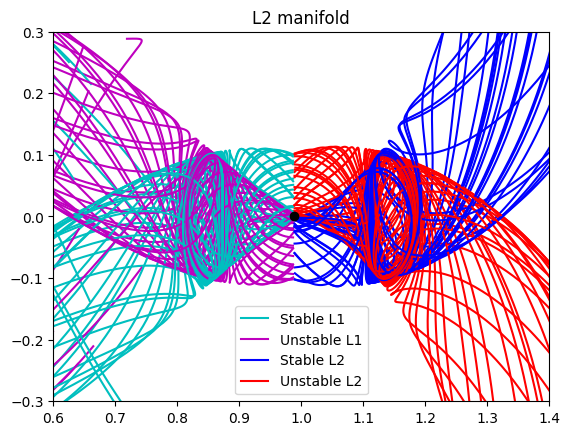

In [59]:
plt.figure()
for i in range(len(cutsL2)):
    if i == 0:
        plt.plot(cuts[i][0], cuts[i][1], "c", label="Stable L1")
        plt.plot(cutu[i][0], cutu[i][1], "m", label="Unstable L1")
        plt.plot(cutsL2[i][0], cutsL2[i][1], "b", label="Stable L2")
        plt.plot(cutuL2[i][0], cutuL2[i][1], "r", label="Unstable L2")
    else:
        plt.plot(cuts[i][0], cuts[i][1], "c")
        plt.plot(cutu[i][0], cutu[i][1], "m")
        plt.plot(cutsL2[i][0], cutsL2[i][1], "b")
        plt.plot(cutuL2[i][0], cutuL2[i][1], "r")
    
plt.plot([1-muEM], [0], "ko")
plt.xlim(0.6, 1.4)
plt.ylim(-0.3, 0.3)
plt.legend()
plt.title("L2 manifold")
plt.show()

In [46]:
def EPS2(S, tol):
    # Poincare section at y = 0
    # We limit the x axis to a range [1-mu 1.2]
    x_lim_i = 0.5
    x_lim_s = 1

    # Compute the distance to the section
    if abs(S[1]) < tol and S[0] > x_lim_i and S[0] < x_lim_s:
        return True
    else:
        return False
    

In [60]:
def EPS3(S, tol):
    # Poincare section at y = 0
    # We limit the x axis to a range [1-mu 1.2]
    x_lim_i = 1-muEM
    x_lim_s = 2

    # Compute the distance to the section
    if abs(S[1]) < tol and S[0] > x_lim_i and S[0] < x_lim_s:
        return True
    else:
        return False

In [61]:
cutsL1_EPS3, sursL1_EPS3, cutuL1_EPS3, suruL1_EPS3 = manL1.surface_hit(EPS3, 1e-3)

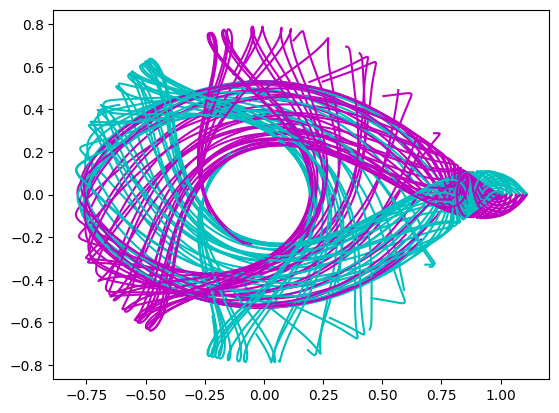

In [62]:
plt.figure()    
for i in range(len(cutsL1_EPS3)):
    if i == 0:
        plt.plot(cutsL1_EPS3[i][0], cutsL1_EPS3[i][1], "c", label="Stable L1")
        plt.plot(cutuL1_EPS3[i][0], cutuL1_EPS3[i][1], "m", label="Unstable L1")
    else:
        plt.plot(cutsL1_EPS3[i][0], cutsL1_EPS3[i][1], "c")
        plt.plot(cutuL1_EPS3[i][0], cutuL1_EPS3[i][1], "m")
    

In [51]:
cutsL2_EPS2, sursL2_EPS2, cutuL2_EPS2, suruL2_EPS2 = manL2.surface_hit(EPS2, 1e-3)

In [52]:
print(len(sursL2_EPS2), len(suruL2_EPS2))

30 30


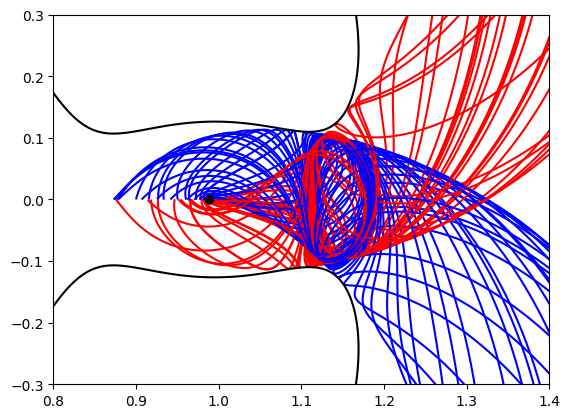

In [54]:
plt.figure()
for i in range(len(cutsL2_EPS2)):
    plt.plot(cutsL2_EPS2[i][0], cutsL2_EPS2[i][1], "r",)
    plt.plot(cutuL2_EPS2[i][0], cutuL2_EPS2[i][1], "b",)
plt.plot([1-muEM], [0], "ko")
plt.xlim(0.8, 1.4)
plt.ylim(-0.3, 0.3)

manL2.plot_ZVC()
plt.show()